# Feature Scaling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


In [2]:
X,y=make_moons(100,noise=0.25,random_state=2)

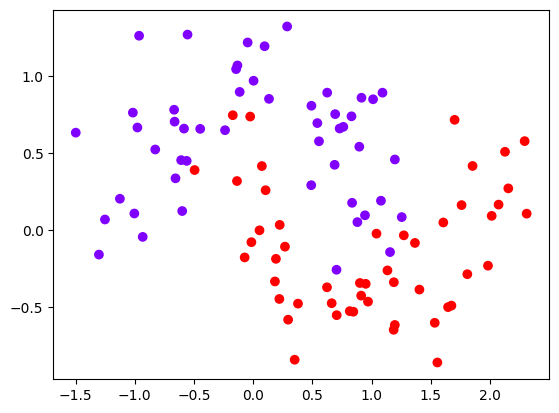

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')
plt.show()

In [4]:
model1=Sequential()
model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
adam=Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history1=model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


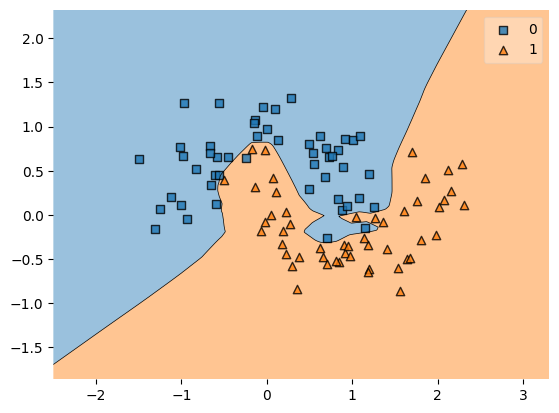

In [13]:
plot_decision_regions(X,y,clf=model1,legend=1)
plt.xlim()
plt.ylim()
plt.show()

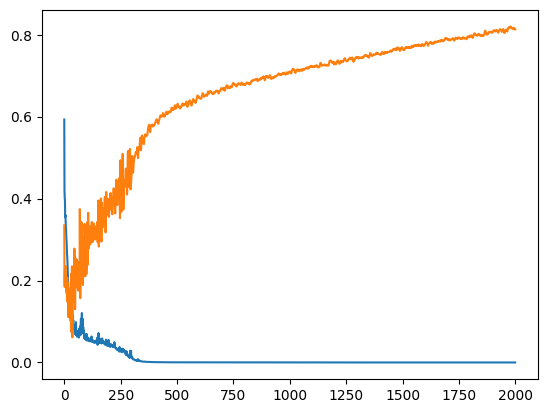

In [15]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])


In [32]:
model2= Sequential()
model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

In [28]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
adam=Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history2=model2.fit(X,y,epochs=1000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


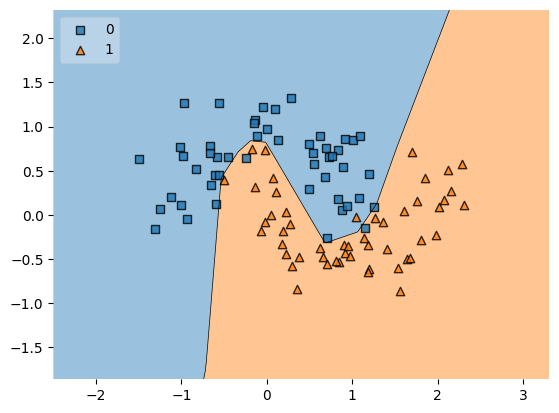

In [34]:
plot_decision_regions(X,y.astype('int'),clf=model2,legend=2)
plt.xlim()
plt.ylim()
plt.show()

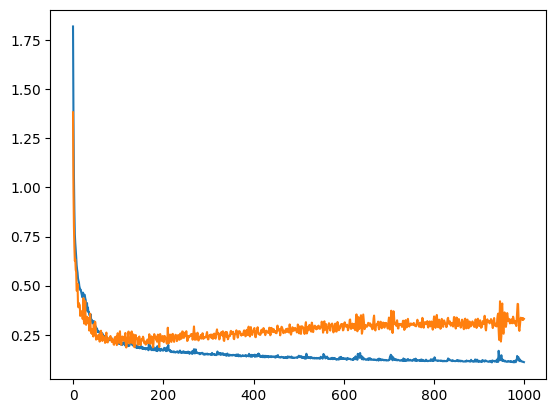

In [36]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.show()

In [37]:
model1.get_weights()[0]

array([[-1.93578705e-01, -3.36092412e-01, -3.80893610e-02,
        -4.68622595e-01,  4.73092087e-02,  3.59306157e-01,
        -4.45053965e-01, -4.94390637e-01,  2.96967059e-01,
         1.48718640e-01,  3.03263336e-01,  1.50755763e-01,
        -3.07540800e-02, -4.82548833e-01,  3.15602273e-01,
         3.63715947e-01, -3.58775929e-02, -1.99626148e-01,
        -3.12536865e-01,  1.77580360e-02, -3.80633593e-01,
         2.88763583e-01, -4.43169847e-02, -1.02013603e-01,
        -1.24356978e-01,  3.11201125e-01, -3.72617781e-01,
         3.19937170e-01, -5.06719053e-01, -1.25671387e-01,
        -4.63747621e-01, -4.67729151e-01, -1.65885583e-01,
         3.70595098e-01,  7.36083463e-02,  2.91601658e-01,
         4.37011160e-02,  3.90224084e-02, -6.96046576e-02,
        -3.30374628e-01, -2.45868653e-01,  2.16161281e-01,
         2.71071345e-01,  3.42246354e-01, -3.24219853e-01,
        -4.53481108e-01, -4.36413348e-01,  2.03842029e-01,
        -8.60458091e-02, -2.57865041e-01,  2.80741304e-0

In [38]:
model2.get_weights()[0]

array([[ 3.37342615e-04,  8.03986609e-01, -6.07933151e-04,
         3.04051093e-04,  1.84420685e-04, -3.79877980e-04,
         2.15741689e-04, -9.70663619e-04, -1.11908405e-04,
         1.94575894e-03,  1.15343177e+00,  1.55344940e-04,
        -2.18264380e-04, -1.88058221e+00, -2.43702228e-03,
         8.39089215e-01, -3.49983457e-04,  8.93954639e-05,
         2.40111956e-03, -1.73237000e-03,  9.91778681e-04,
        -5.29231541e-02, -3.74785950e-03,  4.39690833e-04,
        -7.58187438e-04,  8.76907259e-04, -2.26951577e-03,
         1.00195757e-03, -8.78049294e-04, -1.86879211e-03,
         8.95513117e-01, -1.87648239e-03,  2.61804671e-05,
        -1.20329690e+00,  1.01215104e-04,  1.30879227e-03,
         4.59771487e-04,  5.22027374e-04,  4.02014703e-04,
        -4.63287986e-04,  1.06021529e-03,  4.10395005e-05,
        -3.31386284e-04, -1.84345816e-03, -1.13750063e-03,
         9.77323871e-05, -1.58679904e-05, -8.08314944e-05,
        -6.76961325e-04,  8.86755646e-04, -3.06416908e-0